# Primjene QR rastava

---

## Rješavanje sustava linearnih jednadžbi

QR rastav možemo koristiti za rješavanje sustava linearnih jednadžbi.
U odnosu na rješenje pomoću Gauss-ove eliminacije vrijedi:

* broj računskih operacija se udvostruči,
* rješenje je nešto točnije, i
* nema rasta elemenata (pivotiranje nije potrebno).

In [1]:
n=10
A=rand(n,n)
b=rand(n)
Q,R=qr(A)
c=Q'*b
# Trokutasti sustav
x=R\c

10-element Array{Float64,1}:
  1.37245  
  0.138852 
  0.0369082
  0.86502  
 -0.816144 
  0.900215 
  0.266331 
  0.0909494
 -1.46383  
 -0.601493 

In [2]:
A*x-b

10-element Array{Float64,1}:
  5.55112e-17
  1.66533e-16
  6.66134e-16
 -2.498e-16  
  6.66134e-16
 -1.11022e-16
  8.88178e-16
 -2.77556e-16
  1.66533e-16
  1.11022e-16

## Rješavanje problema najmanjih kvadrata

Programi za rješavanje problema najmanjih kvadrata uglavnom koriste QR rastav. Vrijedi

$$
\|Ax-b\|^2_2=\|QRx-b\|_2^2=\|Q(Rx-Q^Tb)\|_2=\|Rx-Q^Tb\|_2^2.
$$

Neka je

$$
R=\begin{bmatrix}R_0 \\ 0\end{bmatrix},\quad Q^Tb =\begin{bmatrix}c\\ d \end{bmatrix}.
$$

Tada je

$$
\|Rx-Q^T b\|_2^2 = \| R_0x-c\|_2^2+\|d\|_2^2
$$

pa je rješenje trokutastog sustava

$$
R_0x=c
$$
    
rješenje problema najmanjih kvadrata.

In [3]:
A=[1 2 3 6 7;1 1 1 1 1]'

5x2 Array{Int64,2}:
 1  1
 2  1
 3  1
 6  1
 7  1

In [4]:
Q,R=qr(A)

(
5x2 Array{Float64,2}:
 -0.100504  -0.694576
 -0.201008  -0.529614
 -0.301511  -0.364653
 -0.603023   0.130233
 -0.703526   0.295195,

2x2 Array{Float64,2}:
 -9.94987  -1.90957
  0.0      -1.16342)

In [5]:
Q'*Q

2x2 Array{Float64,2}:
  1.0          -1.16676e-16
 -1.16676e-16   1.0        

In [3]:
A=rand(8,5)
b=rand(8)
Q,R=qr(A,thin=true)
c=Q'*b
x=R\c

5-element Array{Float64,1}:
  0.088814 
  0.0781431
  1.02405  
  0.487665 
 -0.906245 

In [4]:
x1=A\b

5-element Array{Float64,1}:
  0.088814 
  0.0781431
  1.02405  
  0.487665 
 -0.906245 

## Numerička  "ortogonalizacija" polinoma

Numerička ortogonalizacija potencija slučajnih vektora daje ortogonalne polinome.

In [5]:
# Standardna baza
n=100
x=collect(linspace(-1,1,n))
# Kvazi Vandermonde-ova matrica
V=[x.^0 x.^1 x.^2 x.^3 x.^4 x.^5]

100x6 Array{Float64,2}:
 1.0  -1.0       1.0       -1.0       1.0       -1.0     
 1.0  -0.979798  0.960004  -0.94061   0.921608  -0.902989
 1.0  -0.959596  0.920824  -0.883619  0.847918  -0.813658
 1.0  -0.939394  0.882461  -0.828978  0.778737  -0.731541
 1.0  -0.919192  0.844914  -0.776638  0.713879  -0.656192
 1.0  -0.89899   0.808183  -0.726548  0.65316   -0.587184
 1.0  -0.878788  0.772268  -0.67866   0.596398  -0.524107
 1.0  -0.858586  0.73717   -0.632923  0.543419  -0.466572
 1.0  -0.838384  0.702887  -0.589289  0.494051  -0.414204
 1.0  -0.818182  0.669421  -0.547708  0.448125  -0.366648
 1.0  -0.79798   0.636772  -0.508131  0.405478  -0.323563
 1.0  -0.777778  0.604938  -0.470508  0.36595   -0.284628
 1.0  -0.757576  0.573921  -0.434789  0.329385  -0.249534
 ⋮                                               ⋮       
 1.0   0.777778  0.604938   0.470508  0.36595    0.284628
 1.0   0.79798   0.636772   0.508131  0.405478   0.323563
 1.0   0.818182  0.669421   0.547708  0.448125  

In [6]:
# Ortogonalizacija s težinskom funkcijom ω=1 daje normirane Legendre-ove polinome.
Q,R=qr(V,thin=true)
Q=Q*sign(diagm(diag(R)))

100x6 Array{Float64,2}:
 0.1  -0.171482  0.216998   -0.249164     0.271442   -0.285443  
 0.1  -0.168017  0.203846   -0.218963     0.216605   -0.198945  
 0.1  -0.164553  0.190963   -0.190302     0.166805   -0.124804  
 0.1  -0.161089  0.178349   -0.16315      0.121798   -0.0620008 
 0.1  -0.157625  0.166002   -0.137476     0.0813471  -0.00956382
 0.1  -0.15416   0.153925   -0.113247     0.0452209   0.0334314 
 0.1  -0.150696  0.142115   -0.0904321    0.0131919   0.0678636 
 0.1  -0.147232  0.130574   -0.0689992   -0.014962    0.0945669 
 0.1  -0.143767  0.119302   -0.0489166   -0.0394579   0.114332  
 0.1  -0.140303  0.108297   -0.0301525   -0.0605077   0.127905  
 0.1  -0.136839  0.0975617  -0.0126751   -0.0783184   0.135994  
 0.1  -0.133375  0.0870943   0.00354726  -0.0930919   0.139263  
 0.1  -0.12991   0.0768952   0.0185465   -0.105025    0.138336  
 ⋮                                                    ⋮         
 0.1   0.133375  0.0870943  -0.00354726  -0.0930919  -0.139263  
 

In [8]:
using Winston

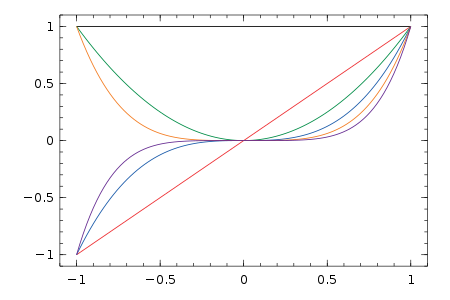

In [9]:
plot(x,V)

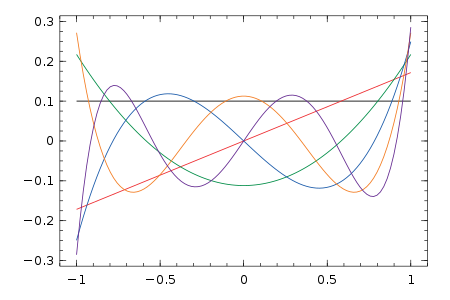

In [10]:
plot(x,Q)

Dobiveni vektori su vrijednosti normiranih Legendre-ovih polinoma iz blježnice [NA12_Ortogonalni_polinomi.ipynb](NA12_Ortogonalni_polinomi.ipynb).

Da bi dobili Čebiševljeve polinome, trebamo dodati težinsku funkciju $\omega$ i preraditi funkciju `myGramSchmidtQR()` iz bilježnice [NA15_QR_rastav.ipynb](NA15_QR_rastav.ipynb) tako da računa __težinske skalarne produkte__. Dobiveni vektori su vrijednosti normiranih Čebiševljevih polinoma.


In [11]:
function myWeightedGramSchmidtQR{T}(A::Array{T},ω::Vector{T})
    m,n=size(A)
    R=zeros(Float64,n,n)
    Q=Array(Float64,m,n)
    R[1,1]=norm(A[:,1])
    Q[:,1]=A[:,1]/R[1,1]
    for k=2:n
        for i=1:k-1
            R[i,k]=Q[:,i]⋅(A[:,k].*ω)/(Q[:,i]⋅(Q[:,i].*ω))
        end
        t=A[:,k]-sum([R[i,k]*Q[:,i] for i=1:k-1])
        R[k,k]=norm(t)
        Q[:,k]=t/R[k,k]
    end
    Q,R
end

myWeightedGramSchmidtQR (generic function with 1 method)

In [12]:
n=100
x=collect(linspace(-0.99,0.99,n))
ω=1./(sqrt(1-x.^2))
# Kvazi Vandermonde-ova matrica
V=[x.^0 x.^1 x.^2 x.^3 x.^4 x.^5]

100x6 Array{Float64,2}:
 1.0  -0.99  0.9801  -0.970299  0.960596  -0.95099 
 1.0  -0.97  0.9409  -0.912673  0.885293  -0.858734
 1.0  -0.95  0.9025  -0.857375  0.814506  -0.773781
 1.0  -0.93  0.8649  -0.804357  0.748052  -0.695688
 1.0  -0.91  0.8281  -0.753571  0.68575   -0.624032
 1.0  -0.89  0.7921  -0.704969  0.627422  -0.558406
 1.0  -0.87  0.7569  -0.658503  0.572898  -0.498421
 1.0  -0.85  0.7225  -0.614125  0.522006  -0.443705
 1.0  -0.83  0.6889  -0.571787  0.474583  -0.393904
 1.0  -0.81  0.6561  -0.531441  0.430467  -0.348678
 1.0  -0.79  0.6241  -0.493039  0.389501  -0.307706
 1.0  -0.77  0.5929  -0.456533  0.35153   -0.270678
 1.0  -0.75  0.5625  -0.421875  0.316406  -0.237305
 ⋮                                         ⋮       
 1.0   0.77  0.5929   0.456533  0.35153    0.270678
 1.0   0.79  0.6241   0.493039  0.389501   0.307706
 1.0   0.81  0.6561   0.531441  0.430467   0.348678
 1.0   0.83  0.6889   0.571787  0.474583   0.393904
 1.0   0.85  0.7225   0.614125  0.522006

In [13]:
Q,R=myWeightedGramSchmidtQR(V,ω)
Q=Q*sign(diagm(diag(R)))

100x6 Array{Float64,2}:
 0.1  -0.171482  0.150624   -0.147774     0.144547    -0.139908 
 0.1  -0.168017  0.138822   -0.12221      0.100715    -0.0743526
 0.1  -0.164553  0.12726    -0.0980281    0.0613082   -0.0193541
 0.1  -0.161089  0.11594    -0.0752001    0.0261088    0.0259973
 0.1  -0.157625  0.10486    -0.0536975   -0.00509746   0.0625685
 0.1  -0.15416   0.0940209  -0.0334917   -0.0325198    0.091184 
 0.1  -0.150696  0.0834228  -0.0145544   -0.056363     0.112627 
 0.1  -0.147232  0.0730655   0.00314315  -0.0768273    0.127639 
 0.1  -0.143767  0.0629492   0.0196293   -0.0941083    0.136924 
 0.1  -0.140303  0.0530737   0.0349326   -0.108397     0.141146 
 0.1  -0.136839  0.043439    0.0490815   -0.11988      0.14093  
 0.1  -0.133375  0.0340453   0.0621045   -0.12874      0.136867 
 0.1  -0.12991   0.0248924   0.0740302   -0.135153     0.12951  
 ⋮                                                     ⋮        
 0.1   0.133375  0.0340453  -0.0621045   -0.12874     -0.136867 
 

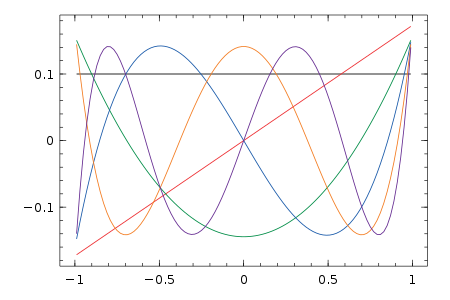

In [14]:
plot(x,Q)